### Netflix Data Analysis
#### This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. It will be interesting to explore what insights can be obtained from this dataset.
#### We can find this dataset from <a href="https://www.kaggle.com/shivamb/netflix-shows">Kaggle</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


#### Data Preparation and Cleaning

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Check percentage of the missing values

In [4]:
percent_missing = netflix.isnull().sum() / len(netflix) * 100
percent_missing.round(2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [4]:
report = ProfileReport(netflix)

In [5]:
report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Exploratory Data Analysis

### Comparison of Country wise (top 10) Netflix content

In [7]:
netflix['country'].value_counts()

United States                                   2555
India                                            923
United Kingdom                                   397
Japan                                            226
South Korea                                      183
                                                ... 
France, United States, Mexico                      1
Germany, Jordan, Netherlands                       1
Australia, Iraq                                    1
India, United Kingdom, Canada, United States       1
United States, France, United Kingdom, Japan       1
Name: country, Length: 681, dtype: int64

In [8]:
netflix['country'].nunique()

681

As the majority of Netfilx is released in the US, we will replace the missing values with US

In [9]:
netflix['country'].fillna(value= 'United States', inplace = True)

In [10]:
countries = pd.Series(netflix['country'].str.split(', ').sum()).value_counts()

In [11]:
# setting some parameters for nice plots
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Text(0.5, 0, 'Total Count (Movie & TV Shows)')

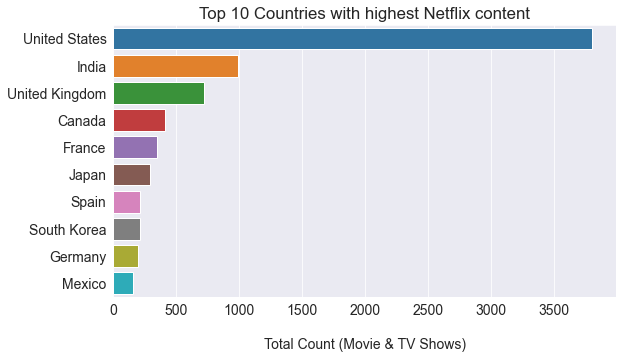

In [12]:
# top 10 counties
top10_countries = countries.head(10).index
top10_countries_count = countries.head(10).values

sns.barplot(x = top10_countries_count, y = top10_countries)
plt.title('Top 10 Countries with highest Netflix content')
plt.xlabel('Total Count (Movie & TV Shows)', labelpad= 20)

In [13]:
country_percentage = countries.value_counts()/len(countries) * 100
country_percentage.round(2).head(5)

1     32.23
3      6.61
2      5.79
4      4.13
26     3.31
dtype: float64

Text(0.5, 0, 'Percentage (%)')

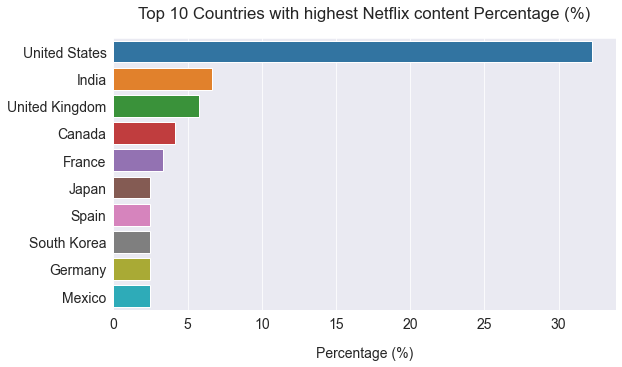

In [14]:
# top 10 counties percentage
top10_countries = countries.head(10).index
top10_countries_count = country_percentage.head(10).values

sns.barplot(x = top10_countries_count, y = top10_countries)
plt.title('Top 10 Countries with highest Netflix content Percentage (%)',
         y=1.05)
plt.xlabel('Percentage (%)', labelpad= 15)

In [16]:
# for c in netflix['country']:
#     if c not in top5_countries:
#         netflix['country'].replace('c','Other')
        
# df = netflix[netflix['country']!= 'United States' &
#             netflix['country']!= 'India'&
#             netflix['country']!= 'United Kingdom'&
#             netflix['country']!= 'Japan'&
#             netflix['country']!= 'South Korea'&
#             netflix['country']!= 'Canada']

Converting to datetime format

In [15]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [16]:
# drop date_added missing rows as there is 0.13%
netflix = netflix[netflix['date_added'].notna()]

# drop rating missing rows as there is 0.09%
netflix = netflix[netflix['rating'].notna()]

In [17]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2376
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

### Create new columns

In [18]:
netflix['year_added'] = netflix['date_added'].apply(lambda time:time.year)

netflix['month_added'] = netflix['date_added'].apply(lambda time:time.month)

### Ratings

We can find maturity ratings information from <a href="https://help.netflix.com/en/node/2064">Netflix</a>

In [19]:
netflix['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
netflix['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Text(0.5, 1.2, 'Rating Ages')

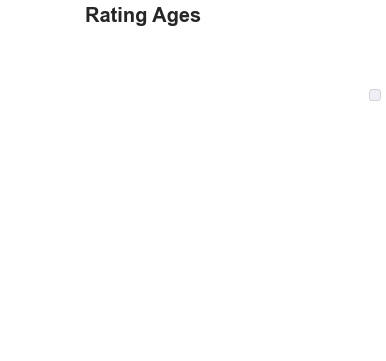

In [58]:
rating_ages = {'TV-PG': 'Older Kids', 
               'TV-MA': 'Adults',
               'TV-Y7-FV': 'Older Kids',
               'TV-Y7': 'Older Kids',
               'TV-14': 'Teens',
               'R': 'Adults',
               'TV-Y': 'Kids',
               'NR': 'Adults',
               'PG-13': 'Teens',
               'TV-G': 'Kids',
               'PG': 'Older Kids',
               'G': 'Kids',
               'UR': 'Adults',
               'NC-17': 'Adults'}

# Use the .map() with this dictionary to map the actual string names to the rating
netflix['rating'] = netflix['rating'].map(rating_ages)

netflix['rating'].unique()

content_type = netflix['rating'].value_counts()
plt.pie(content_type.values,labels = content_type.index,autopct='%1.2f%%',radius=1.5)
plt.legend(content_type.index,loc="upper center", bbox_to_anchor=(1.35, 1),ncol=1)
plt.title('Rating Ages',y=1.2,fontsize=20,weight='bold')

### We can find maturity ratings information from <a href="https://help.netflix.com/en/node/2064">Netflix</a> 
1. TV-MA = Mature Audience Only
2. PG,TV-PG = Parental Guidance suggested
3. TV-Y7 = Directed to older children
4. TV-Y = All Children
5. TV-Y7-FV =Directed to older children and Fantasy Violence
6. G,TV-G = General Audience
7. TV-14 = Parents strongly cautioned
8. NC-17 = No one below 17 years
9. R = Restricted. Under 17 requires PG
10. UR = Under review (because some corrections were suggested), still no new rating is given
11. NR = Not rated yet

### Can be categorized into 4 categories
1. Adults
2. Teens
3. Older Kids
4. Kids 

### As we can see from the pie chart:
1. Majority content is for adults (46.55%).
2. Teens content also have a significant portion (about 30%) among all.
3. In conclusion around 77% of content is targetted for Teens and Adults.

Now use seaborn to create a countplot of TV shows vs movies by rating

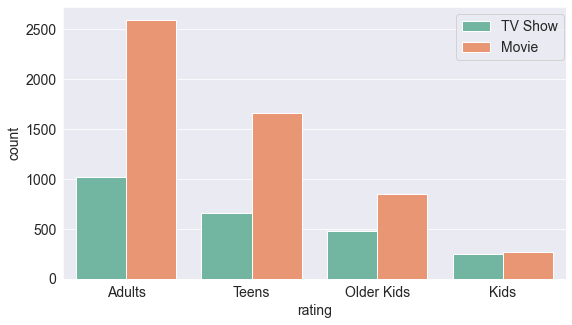

In [53]:
sns.countplot(data = netflix, x = 'rating', palette='Set2',hue = 'type')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper right', ncol=1)

We can see from this chart, movie is more popular in general across all ages.

Text(0.5, 1.0, 'Netflix content added from 2008 to 2021')

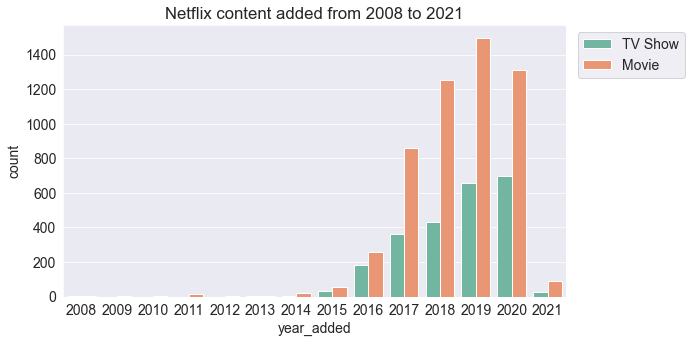

In [52]:
sns.countplot(data = netflix, x = 'year_added',palette="Set2",hue = 'type')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.title('Netflix content added from 2008 to 2021')

1. Both movies and TV shows have an increasing trend during the years.
2. Movie has a larger increase after 2016 compared to TV shows.
3. There is a small drop for added movie in 2020, this is probaly due to the covid-19 pandamic.

### Pie chart: TV Shows VS Movies

Text(0.5, 1.15, 'TV Shows vs Movies')

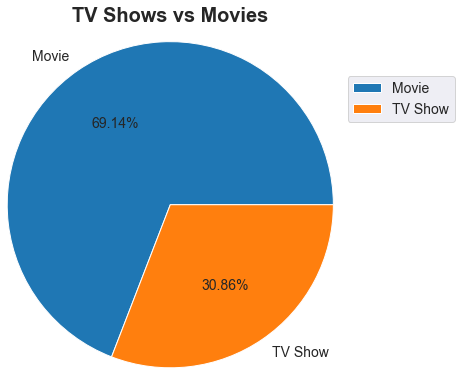

In [51]:
content_type = netflix['type'].value_counts()
plt.pie(content_type.values,labels=content_type.index,autopct='%1.2f%%',radius=1.5)
plt.legend(content_type.index,loc="upper center", bbox_to_anchor=(1.35, 1),ncol=1)
plt.title('TV Shows vs Movies',y=1.15,fontsize=20,weight='bold')

Movies content on netflix is more than 2 times of TV show content

### Genres of Netflix content (TV Show and Movies)

In [27]:
# movie_df = netflix[netflix['type']=='Movie']
# movie_genre = movie_df.value_counts()
# movie_genre.head(2)

In [28]:
# genre_m = movie_genre.index

In [29]:
# count_m = movie_genre.values / movie_genre.values.sum()*100

In [30]:
# tv_df = netflix[netflix['type'] == 'TV Show']
# tv_genre = tv_df.value_counts()
# genre_t= tv_genre.index
# count_t= tv_genre.values / tv_genre.values.sum()*100

In [31]:
# tv_df.head(1)

In [32]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
# ax1.set_title("Genres of Movies and their percentage on Netflix")
# sns.barplot(y = genre_m,x = count_m,ax = ax1)
# ax1.set_xlabel('Total Percentage (%)',labelpad = 20, fontsize = 20)
# ax1.plot()

# ax2.set_title("Genres of TV and their percentage on Netflix")
# sns.barplot(y = genre_t, x = count_t,ax = ax2)
# ax2.set_xlabel('Total Percentage (%)',labelpad = 20, fontsize = 20);
# fig.tight_layout(pad = 3.0)
# fig.suptitle('Distribution of Movie and TV show with genres',y = 1.0,
#              fontsize = 25,weight = 'bold')

In [27]:
movie_df = netflix[netflix['type'] == 'Movie']
movie_genre = pd.Series(movie_df['listed_in'].str.split(', ').sum()).value_counts()
genres_m = movie_genre.index
count_m = movie_genre.values / movie_genre.values.sum() * 100

In [28]:
movie_genre.nunique()

19

In [29]:
tv_df = netflix[netflix['type'] == 'TV Show']
tv_genre = pd.Series(tv_df['listed_in'].str.split(', ').sum()).value_counts()
genres_tv = tv_genre.index
count_tv = tv_genre.values / tv_genre.values.sum() * 100

Text(0.5, 1.0, 'Distribution of Movie and TV show with genres')

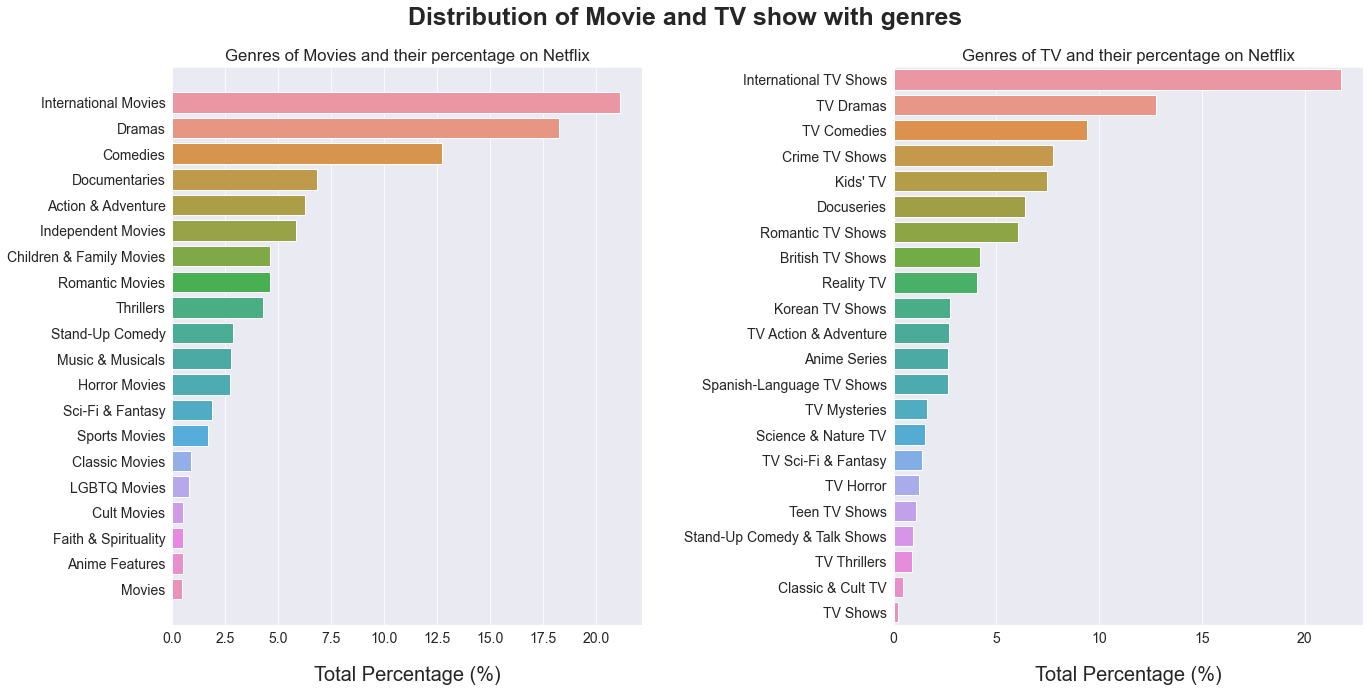

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.set_title("Genres of Movies and their percentage on Netflix")
sns.barplot(y = genres_m,x = count_m,ax = ax1)
ax1.set_xlabel('Total Percentage (%)',labelpad = 20, fontsize = 20)
ax1.plot()

ax2.set_title("Genres of TV and their percentage on Netflix")
sns.barplot(y = genres_tv, x = count_tv,ax = ax2)
ax2.set_xlabel('Total Percentage (%)',labelpad = 20, fontsize = 20);
fig.tight_layout(pad = 3.0)
fig.suptitle('Distribution of Movie and TV show with genres',y = 1.0,
             fontsize = 25,weight = 'bold')

International, Drams, Comedies are the top 3 genres.

### Month

In [31]:
monthly_content=pd.DatetimeIndex(netflix['date_added']).month.value_counts().sort_index()

Text(0, 0.5, 'Frequency')

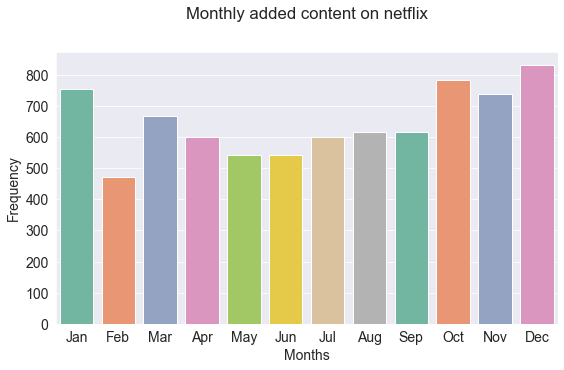

In [46]:
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.title("Monthly added content on netflix",y=1.1)
sns.barplot(y=monthly_content.values,x=order,palette="Set2");
plt.xlabel("Months")
plt.ylabel("Frequency")

More content is added from October to January. December has the highest added content compared to other months, this is maybe due to it's the holiday month.

### On which day of week Netflix uploads the content the most?

Text(0.5, 1.1, 'Distribution of netflix content on the days of week')

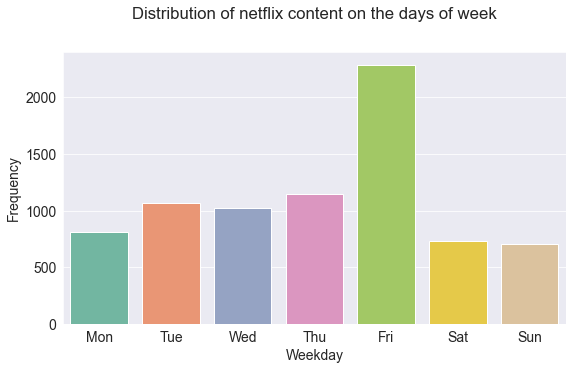

In [59]:
netflix['weekday'] = pd.DatetimeIndex(netflix['date_added']).weekday
weekday_count = netflix.weekday.value_counts().sort_index()

#0 is for Monday
order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.barplot(x=order,y=weekday_count.values,palette="Set2");
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.title("Distribution of netflix content on the days of week",y=1.1)

Most of the content are uploaded on Netflix on Fridays as it's probably the most convenient time for people to watch.

### Word cloud

In [60]:
from wordcloud import WordCloud

In [61]:
review  = ' '.join(review for review in netflix['description'])
wordcloud = WordCloud().generate(review)

(-0.5, 399.5, 199.5, -0.5)

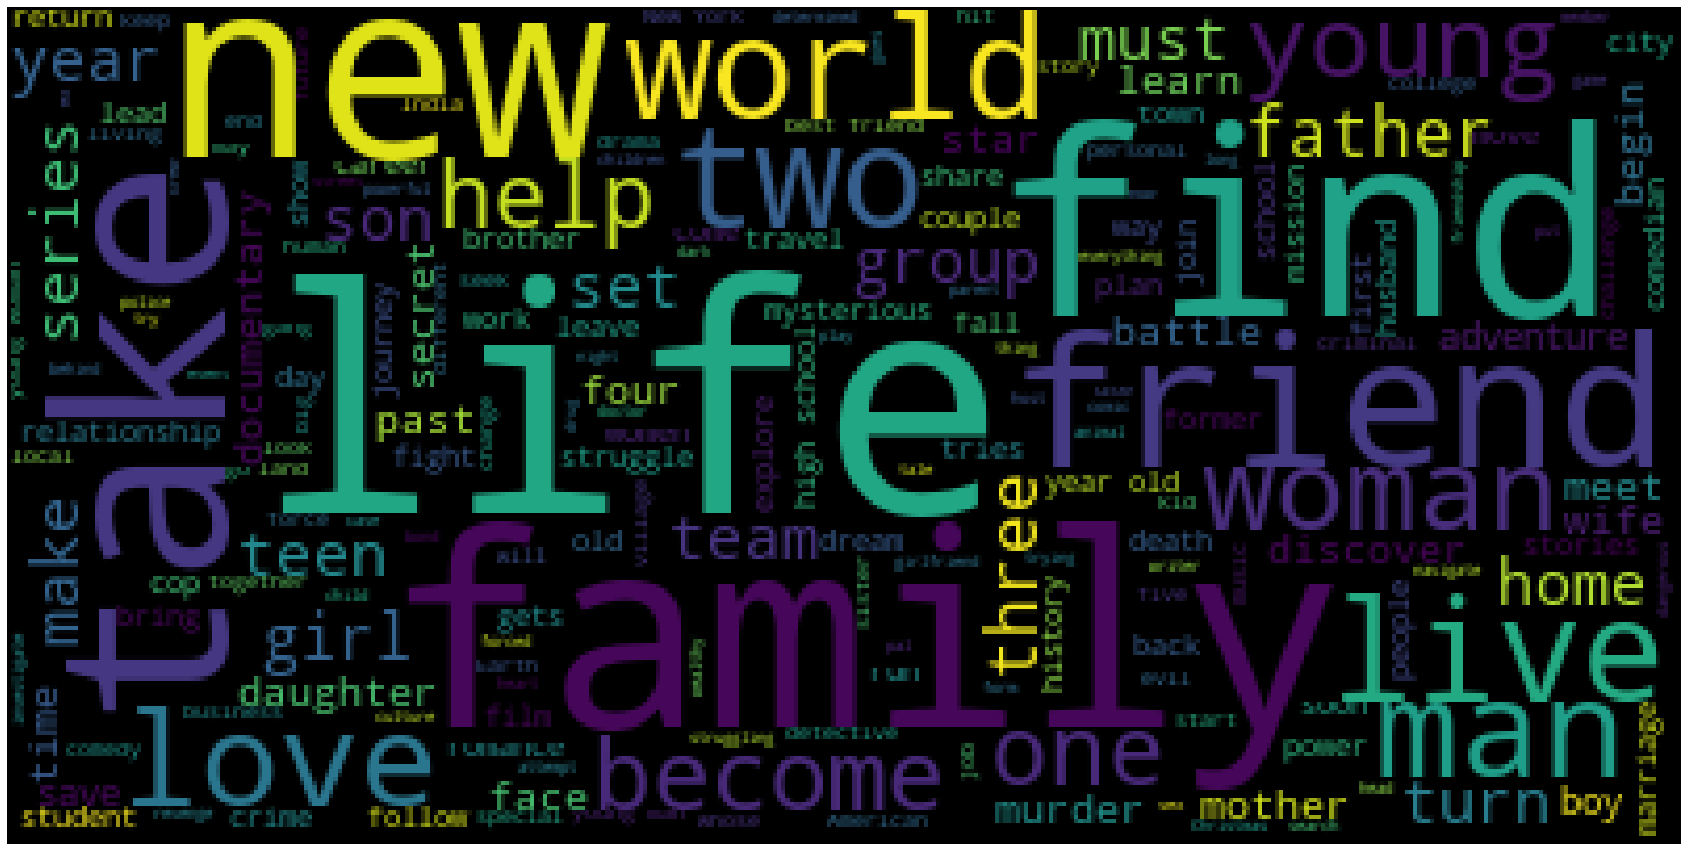

In [62]:
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')

1. Size of words represents their frequency in description. A larger size indicates a higher frequency.
2. From wordcloud we can see, the majority of content is about
   1) Life
   2) Family
   3) Find
   4) Friend
   5) New
   6) Take

### Which TV shows has the most number of seasons?

In [63]:
# remove Season/s from duration by converting to string and then convert to float for calculation
netflix[netflix['type']=='TV Show']['duration'].str.replace('Season','').str.replace('s','').astype(float).max()

16.0

In [64]:
netflix[(netflix['type'] == 'TV Show') & (netflix.duration == '16 Seasons')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,2019,NaN,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020,5,5


Grey's Anatomy has maximum number of seasons 16.

### Which TV shows has the least number of seasons?

In [65]:
netflix[netflix['type']=='TV Show']['duration'].str.replace('Season','').str.replace('s','').astype(float).min()

1.0

In [66]:
min_season = netflix[(netflix['type'] == 'TV Show') & (netflix.duration == '1 Season')]

In [67]:
min_season.nunique()

show_id         1606
type               1
title           1606
director         137
cast            1346
country          129
date_added       694
release_year      40
rating             0
duration           1
listed_in        177
description     1604
year_added         9
month_added       12
weekday            7
dtype: int64

There are 1606 TV Shows that have 1 season. 

<AxesSubplot:xlabel='year_added', ylabel='weekday'>

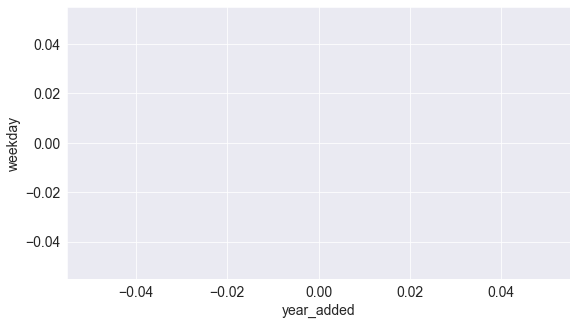

In [68]:
sns.lineplot(data = min_season, x = 'year_added',y = 'weekday',hue='rating')

### Analysis of TV Shows and their duration

In [69]:
netflix[netflix['type'] == 'TV Show']['duration'].value_counts()

1 Season      1606
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
12 Seasons       2
11 Seasons       2
15 Seasons       2
16 Seasons       1
13 Seasons       1
Name: duration, dtype: int64

TV Sows with 1 Season before 2018

In [70]:
season1_before2018 = netflix[(netflix['type'] == 'TV Show' ) &
                            (min_season['year_added'] < 2018 )]

In [71]:
season1_before2018.count()

show_id         418
type            418
title           418
director         34
cast            373
country         418
date_added      418
release_year    418
rating            0
duration        418
listed_in       418
description     418
year_added      418
month_added     418
weekday         418
dtype: int64

In [72]:
a = season1_before2018['rating'].value_counts() / len(season1_before2018['rating']) * 100
a.round(2)

Series([], Name: rating, dtype: float64)

The number of TV Shows which have only 1 season and uploaded before 2018 is  418.
1. 38.76% of them are for teens
2. Little chance of season 2 come out

In [58]:
season1_after2018 = netflix[(netflix['type'] == 'TV Show' ) &
                            (min_season['year_added'] >= 2018 )]

In [59]:
season1_after2018.count()

show_id         1188
type            1188
title           1188
director         108
cast             999
country         1188
date_added      1188
release_year    1188
rating          1188
duration        1188
listed_in       1188
description     1188
year_added      1188
month_added     1188
weekday         1188
dtype: int64

In [60]:
a = season1_after2018['rating'].value_counts() / len(season1_after2018['rating']) * 100
a.round(2)

Adults        49.24
Teens         25.93
Older Kids    15.66
Kids           9.18
Name: rating, dtype: float64

The number of TV Shows which have only 1 season and uploaded after 2018 is 1188
1. Almost half of them are for adults
2. Still possible to have season 2

### Country which watches comedy TV shows most?

In [61]:
# netflix['genre'] = pd.Series(netflix['listed_in'].apply(
#     lambda x: x.replace(',',',').replace(', ',',').split(',')))

# def Extract(lst):
#     return [item[0] for item in lst]

# lst = netflix['genre']

# netflix['genre'] = Extract(lst)
# netflix.head(3)

### Top 5 TV shows countries

In [62]:
top5_tv_counties = netflix[netflix['type']=='TV Show']
top5_tv_counties = pd.Series(top5_tv_counties['country']).value_counts().head(5)
top5_tv_counties

United States     975
United Kingdom    203
Japan             155
South Korea       147
India              71
Name: country, dtype: int64

In [63]:
#Define function to see the count of values in a particular column 
def count_values_column(df,condition,column_name):       
    result = pd.Series(df[condition][column_name].dropna().str.split(', ').sum()).value_counts()
    return result

In [64]:
condition = (netflix['type']=='TV Show') & (netflix['listed_in'].str.contains('Comedy'))
column_name = "country"      
count_values_column(netflix,condition,column_name) 

United States     40
South Korea        3
India              3
United Kingdom     1
Brazil             1
Mexico             1
Japan              1
Germany            1
France             1
dtype: int64

As expected, comedy is most watched in the US.

### Country which watches International series most?

In [65]:
condition = (netflix['type']=='TV Show') & (netflix['listed_in'].str.contains('International'))
column_name = "country"      
count_values_column(netflix,condition,column_name).head(5) 

United States     222
South Korea       139
Japan             138
United Kingdom    116
Taiwan             70
dtype: int64

As expected, International is most watched in the US.

### Which genre of TV shows is being released more in South Korea Japan, and India?

In [66]:
condition = (netflix['country'] == 'South Korea') &(netflix['type'] == 'TV Show')
column_name ="listed_in"      
count_values_column(netflix,condition,column_name)

International TV Shows          138
Korean TV Shows                 130
Romantic TV Shows                72
TV Dramas                        28
Crime TV Shows                   23
TV Comedies                      13
Kids' TV                          9
TV Action & Adventure             6
Reality TV                        3
TV Horror                         3
TV Mysteries                      3
Stand-Up Comedy & Talk Shows      3
dtype: int64

In [67]:
condition = (netflix['country'] == 'Japan') &(netflix['type'] == 'TV Show')
column_name ="listed_in"      
count_values_column(netflix,condition,column_name) 

International TV Shows          128
Anime Series                    119
Romantic TV Shows                20
TV Dramas                        20
Teen TV Shows                    14
Crime TV Shows                   13
Kids' TV                         12
Reality TV                        6
TV Comedies                       6
TV Horror                         4
TV Thrillers                      4
TV Mysteries                      4
TV Action & Adventure             4
TV Shows                          1
Stand-Up Comedy & Talk Shows      1
Docuseries                        1
dtype: int64

In [68]:
condition = (netflix['country'] == 'India') &(netflix['type'] == 'TV Show')
column_name ="listed_in"      
count_values_column(netflix,condition,column_name)

International TV Shows          59
TV Comedies                     25
TV Dramas                       24
Kids' TV                        10
Romantic TV Shows                9
Crime TV Shows                   8
Docuseries                       7
TV Horror                        7
TV Action & Adventure            5
TV Sci-Fi & Fantasy              3
TV Thrillers                     3
Stand-Up Comedy & Talk Shows     3
TV Mysteries                     3
Reality TV                       3
TV Shows                         2
Teen TV Shows                    1
British TV Shows                 1
dtype: int64

1. International TV shows is most watched in South Korea, Japan, and India.
2. Netflix targets audience based on their interest. For instance, South Korean TV Shows is very popular in South Korea, thus, South Korean TV shows ranked second among all the genres. While Anime Shows is most watched in Japan. Japan is the creator of Anime. 

### Average movie duration

In [69]:
top5_movie_counties = netflix[netflix['type']=='Movie']
top5_movie_counties = pd.Series(top5_movie_counties['country']).value_counts().head(5)
top5_movie_counties

United States     2076
India              852
United Kingdom     193
Canada             118
Egypt               89
Name: country, dtype: int64

In [70]:
US_moive_length_min = netflix[(netflix['type'] == 'Movie') &
                              (netflix['country'] == 'United States')]['duration'].str.replace(' min','')

US_Average_movie_length = US_moive_length_min.astype(float).mean()

print(f'Average movie length in the US is {US_Average_movie_length:0.2f} min')

Average movie length in the US is 88.42 min


In [71]:
India_moive_length_min = netflix[(netflix['type'] == 'Movie') &
                              (netflix['country'] == 'India')]['duration'].str.replace(' min','')

India_Average_movie_length = India_moive_length_min.astype(float).mean()

print(f'Average movie length in India is {India_Average_movie_length:0.2f} min')

Average movie length in India is 127.41 min


In [72]:
CA_moive_length_min = netflix[(netflix['type'] == 'Movie') &
                              (netflix['country'] == 'Canada')]['duration'].str.replace(' min','')

CA_Average_movie_length = CA_moive_length_min.astype(float).mean()

print(f'Average movie length in Canada is {CA_Average_movie_length:0.2f} min')

Average movie length in Canada is 82.37 min


In [73]:
UK_moive_length_min = netflix[(netflix['type'] == 'Movie') &
                              (netflix['country'] == 'United Kingdom')]['duration'].str.replace(' min','')

UK_Average_movie_length = UK_moive_length_min.astype(float).mean()

print(f'Average movie length in United Kingdom is {UK_Average_movie_length:0.2f} min')

Average movie length in United Kingdom is 84.38 min


In [74]:
Egypt_moive_length_min = netflix[(netflix['type'] == 'Movie') &
                              (netflix['country'] == 'Egypt')]['duration'].str.replace(' min','')

Egypt_Average_movie_length = Egypt_moive_length_min.astype(float).mean()

print(f'Average movie length in Egypt is {Egypt_Average_movie_length:0.2f} min')

Average movie length in Egypt is 109.35 min


1. The average movie duration of US, United Kingdom, and Canada is about 1.5 hours compared to about 2 hours in Inida and Egypt. 
2. The reason might be Indian and Egyptian audience perfer to watch longer duration movies. 
3. Movie production cost in different countries is different. This could be another reason why movies in certain countries are shorted.

### Longest and shortest duration movies

In [75]:
longest_movie= netflix[netflix['type']=='Movie']['duration'].str.replace('min','').astype(float).max()
shortest_movie= netflix[netflix['type']=='Movie']['duration'].str.replace('min','').astype(float).min()
print(longest_movie, shortest_movie)

312.0 3.0


In [76]:
longest_movie = netflix[(netflix['type'] == 'Movie') &
                       (netflix['duration'] == '312 min')]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,Adults,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,12,4


In [77]:
longest_movie = netflix[(netflix['type'] == 'Movie') &
                       (netflix['duration'] == '312 min')]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,Adults,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,12,4


In [78]:
shortest_movie = netflix[(netflix['type'] == 'Movie') &
                       (netflix['duration'] == '3 min')]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday
5605,s5606,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,2014,Kids,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019,6,1


1. The longest movie is Black Mirror: Bandersnatch, which is 312 minutes long.
2. The shortest movie is Silent, which only is 3 minutes long.
3. They are both from the US.

### Director with highest Netflix content

In [79]:
netflix['director'].value_counts()

Raúl Campos, Jan Suter             18
Marcus Raboy                       16
Jay Karas                          14
Cathy Garcia-Molina                13
Jay Chapman                        12
                                   ..
Michael A. Nickles                  1
Ricky Gervais, Matthew Robinson     1
Elisabeth Vogler                    1
Ravi Babu                           1
Antongiulio Panizzi                 1
Name: director, Length: 4047, dtype: int64

In [80]:
dir_countlist = pd.Series(netflix['director'].dropna().str.split(', ').sum()).value_counts()
dir_countlist

Jan Suter                 21
Raúl Campos               19
Marcus Raboy              16
Jay Karas                 15
Cathy Garcia-Molina       13
                          ..
Brandon Somerhalder        1
Barry Jenkins              1
Mangesh Hadawale           1
Daniel Sánchez Arévalo     1
Chang Chin-jung            1
Length: 4476, dtype: int64

In [73]:
sns.barplot(y = dir_countlist.head(10).index, palette="Set2", x=dir_countlist.head(10).values)
plt.xticks(range(0,22,2));
plt.xlabel('Total Movies and TV Shows directed',labelpad=15)
plt.title('List of top 10 directors with the highest number of Netflix content',y=1.05)

NameError: name 'dir_countlist' is not defined

###  List of Directors who directed the highest Netflix content in the US?

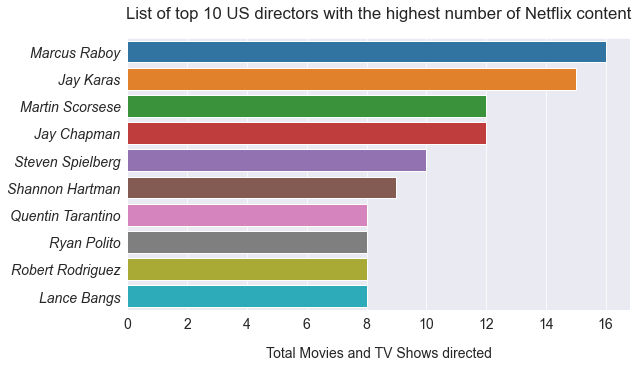

In [82]:
US_directors = netflix[(netflix['director'].notnull()) & (netflix['country'].str.contains('United States'))] 
d = pd.Series(US_directors['director'].str.split(', ').sum()).value_counts()     
sns.barplot(y=d.head(10).index,x=d.head(10).values, palette="Set2");                    
plt.xlabel('Total Movies and TV Shows directed',labelpad=15)
plt.yticks(style='oblique')
sns.set_style('whitegrid')
plt.title('List of top 10 US directors with the highest number of Netflix content',y=1.05);

### Which actor/actress is casted most in Netflix shows?

In [83]:
netflix['cast'].head(10)

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
5    Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...
6    Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...
7    Samuel L. Jackson, John Heard, Kelly Rowan, Cl...
8    Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...
9    Rajneesh Duggal, Adah Sharma, Indraneil Sengup...
Name: cast, dtype: object

In [84]:
top_actors = pd.Series(netflix['cast'].dropna().str.split(', ').sum()).value_counts().head(10)
top_actors

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
Akshay Kumar        29
Paresh Rawal        27
Amitabh Bachchan    27
Yuki Kaji           27
Boman Irani         27
dtype: int64

Top 5 actors who are casted on Netflix are Indians.

### Conclusion
1. Top 5 TV shows countries are United States, United Kingdom, Japan, South Korea, and India. 
2. Top 5 movie coutires are United States, India, United Kingdom, Canada, and Spain.
3. Netflix has different content strategies for different countries. For instance, longer movie duration content for India, Anime series in Japan, South Korea TV Shows in South Korea.
4. More than 76% content is for teens and adults audience.
5. Majoity of the content is uploaded on Fridays and in the Months from October to January.